# Exploratory Data Analysis on the AirBnB data


### Importing of Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


from sklearn.utils import resample

from collections import Counter
air_data = pd.read_csv("listings_june.csv")
zhdf = pd.read_csv("listings_june.csv")

air_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.00,4.00,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.17,4.67,NaN,f,2,0,2,0,0.16
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,t,4,0,4,0,0.29
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,t,4,0,4,0,0.34


# Extracting the response 

<AxesSubplot:>

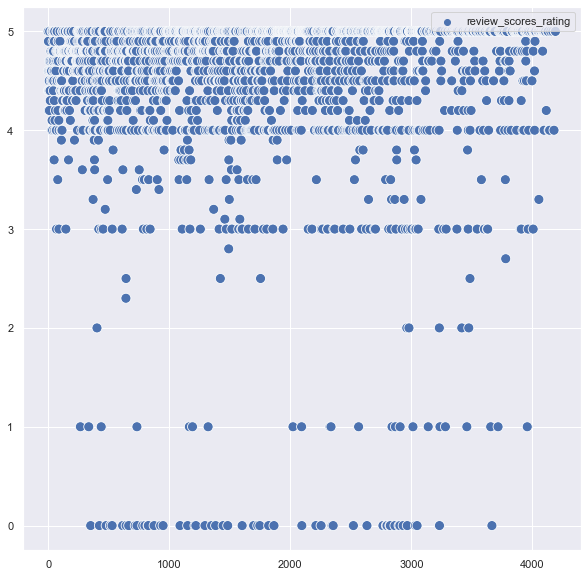

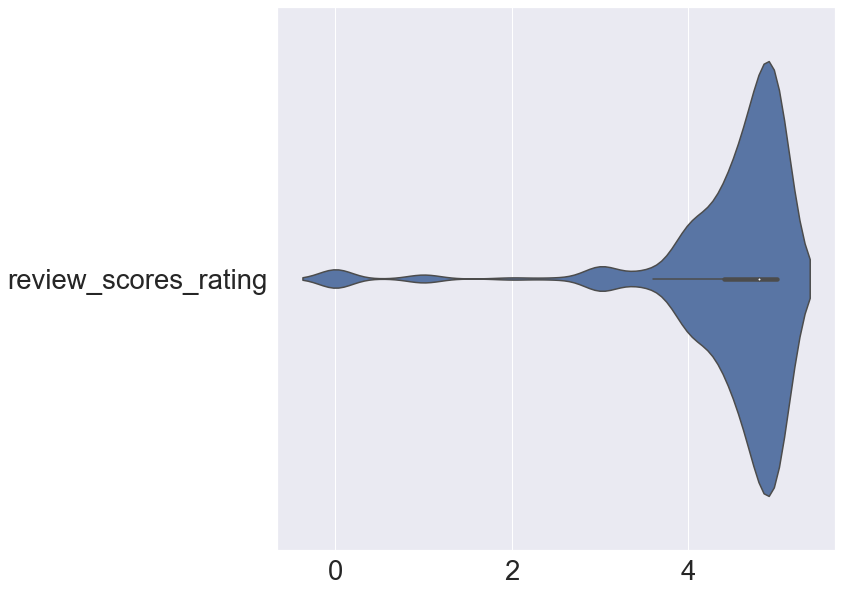

In [2]:
air_data["review_scores_rating"] = air_data["review_scores_rating"].round(1)
ratings = pd.DataFrame(air_data["review_scores_rating"])
ratings.shape
f = plt.figure(figsize=(10, 10))
sb.scatterplot(s=100, data=ratings)
f = plt.figure(figsize=(10, 10))
sb.set(font_scale=2.5)
sb.violinplot(s=100, data=ratings,orient='h')

In [3]:
ratings.isna().sum()

review_scores_rating    1759
dtype: int64

In [4]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4238 non-null   int64  
 1   listing_url                                   4238 non-null   object 
 2   scrape_id                                     4238 non-null   int64  
 3   last_scraped                                  4238 non-null   object 
 4   name                                          4238 non-null   object 
 5   description                                   4091 non-null   object 
 6   neighborhood_overview                         2791 non-null   object 
 7   picture_url                                   4238 non-null   object 
 8   host_id                                       4238 non-null   int64  
 9   host_url                                      4238 non-null   o

In [5]:
air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')
air_data["price"] = pd.to_numeric(air_data["price"], downcast='float')
#air_data = air_data.select_dtypes(exclude=['object'])
#air_data.info()

C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/174682891.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')


In [6]:
#f = plt.figure(figsize=(24, 24))
#sb.heatmap(air_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

## All unique amenities in the top 100 rated AirBnB


In [7]:
#top_air = air_data.sort_values(by=['review_scores_rating'])
top_air = air_data
top_air.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.00,4.00,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.17,4.67,NaN,f,2,0,2,0,0.16
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,t,4,0,4,0,0.29
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,t,4,0,4,0,0.34


In [8]:
top_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4238 non-null   int64  
 1   listing_url                                   4238 non-null   object 
 2   scrape_id                                     4238 non-null   int64  
 3   last_scraped                                  4238 non-null   object 
 4   name                                          4238 non-null   object 
 5   description                                   4091 non-null   object 
 6   neighborhood_overview                         2791 non-null   object 
 7   picture_url                                   4238 non-null   object 
 8   host_id                                       4238 non-null   int64  
 9   host_url                                      4238 non-null   o

In [9]:
top_air["amenities"]=top_air['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["amenities"] =top_air["amenities"].to_frame()
top_air["amenities"].head()


C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/3206109549.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["amenities"]=top_air['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')


0    Air conditioning, Elevator, Wifi, Long term st...
1    Air conditioning, Kitchen, Elevator, Wifi, Gym...
2    Air conditioning, Kitchen, Elevator, Wifi, Cab...
3    Wifi, Washer, Kitchen, Long term stays allowed...
4    Wifi, Washer, Kitchen, Long term stays allowed...
Name: amenities, dtype: object

In [10]:
top_amenities =  pd.DataFrame(''.join(top_air["amenities"]).lower().split(',')).value_counts()
top_amenities = top_air['amenities'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_amenities = top_amenities.rename_axis('amenities').reset_index(name='count')

C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/1280987478.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["host_verifications"]=top_air['host_verifications'].str.replace('[', '').str.replace(']','').str.replace('"','').str.replace('/', '').str.replace("'", '')


<AxesSubplot:xlabel='count', ylabel='host_verifications'>

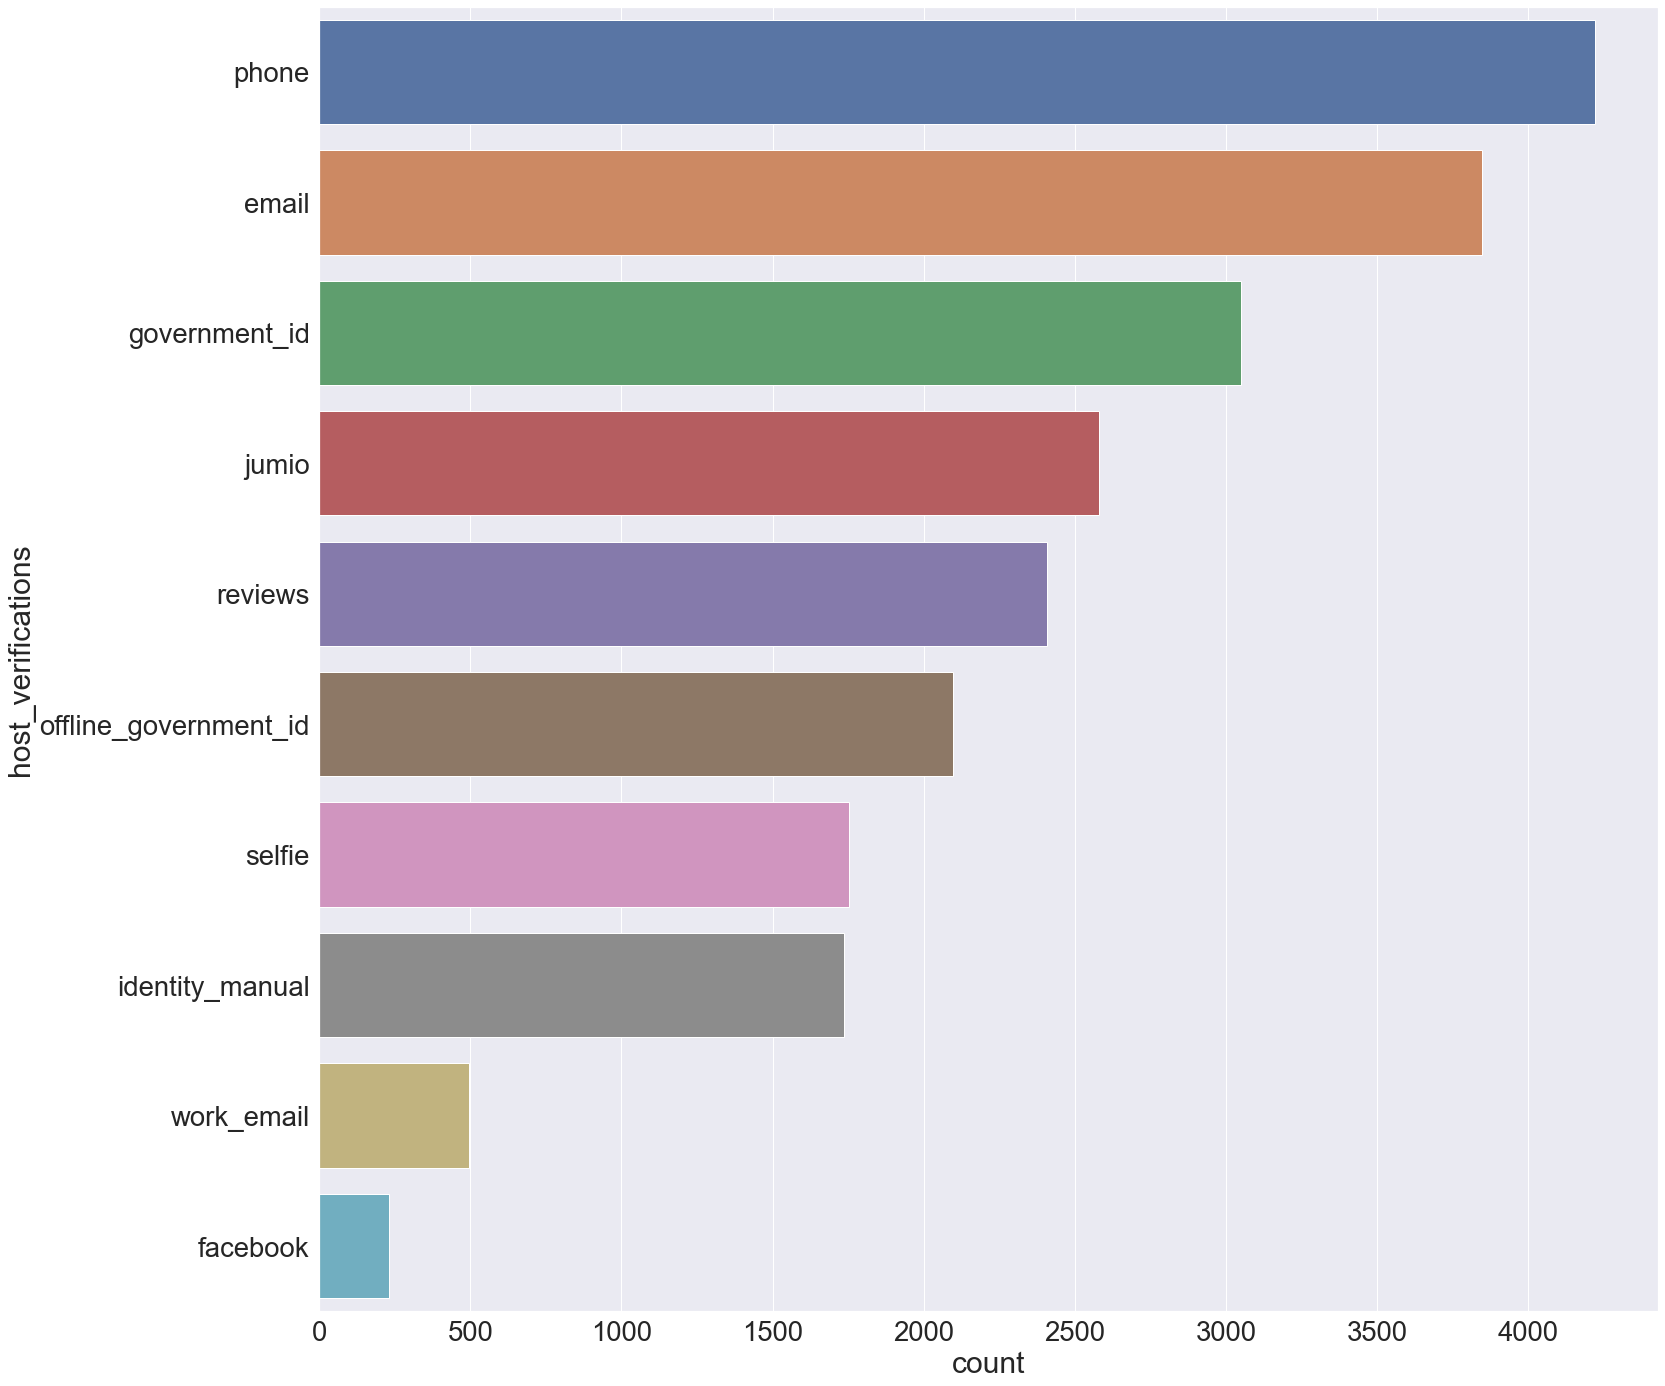

In [11]:
top_air["host_verifications"]=top_air['host_verifications'].str.replace('[', '').str.replace(']','').str.replace('"','').str.replace('/', '').str.replace("'", '')
top_air["num_of_veri"]= top_air["host_verifications"].apply(lambda n: len(n.split(',')))
top_air["num_of_veri"] =top_air["num_of_veri"].to_frame()
top_air["num_of_veri"].head()


top_v =  pd.DataFrame(''.join(top_air["host_verifications"]).lower().split(',')).value_counts()
top_v = top_air['host_verifications'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_v = top_v.rename_axis('host_verifications').reset_index(name='count')

f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="host_verifications", data=top_v,orient = "h")

<AxesSubplot:xlabel='count', ylabel='amenities'>

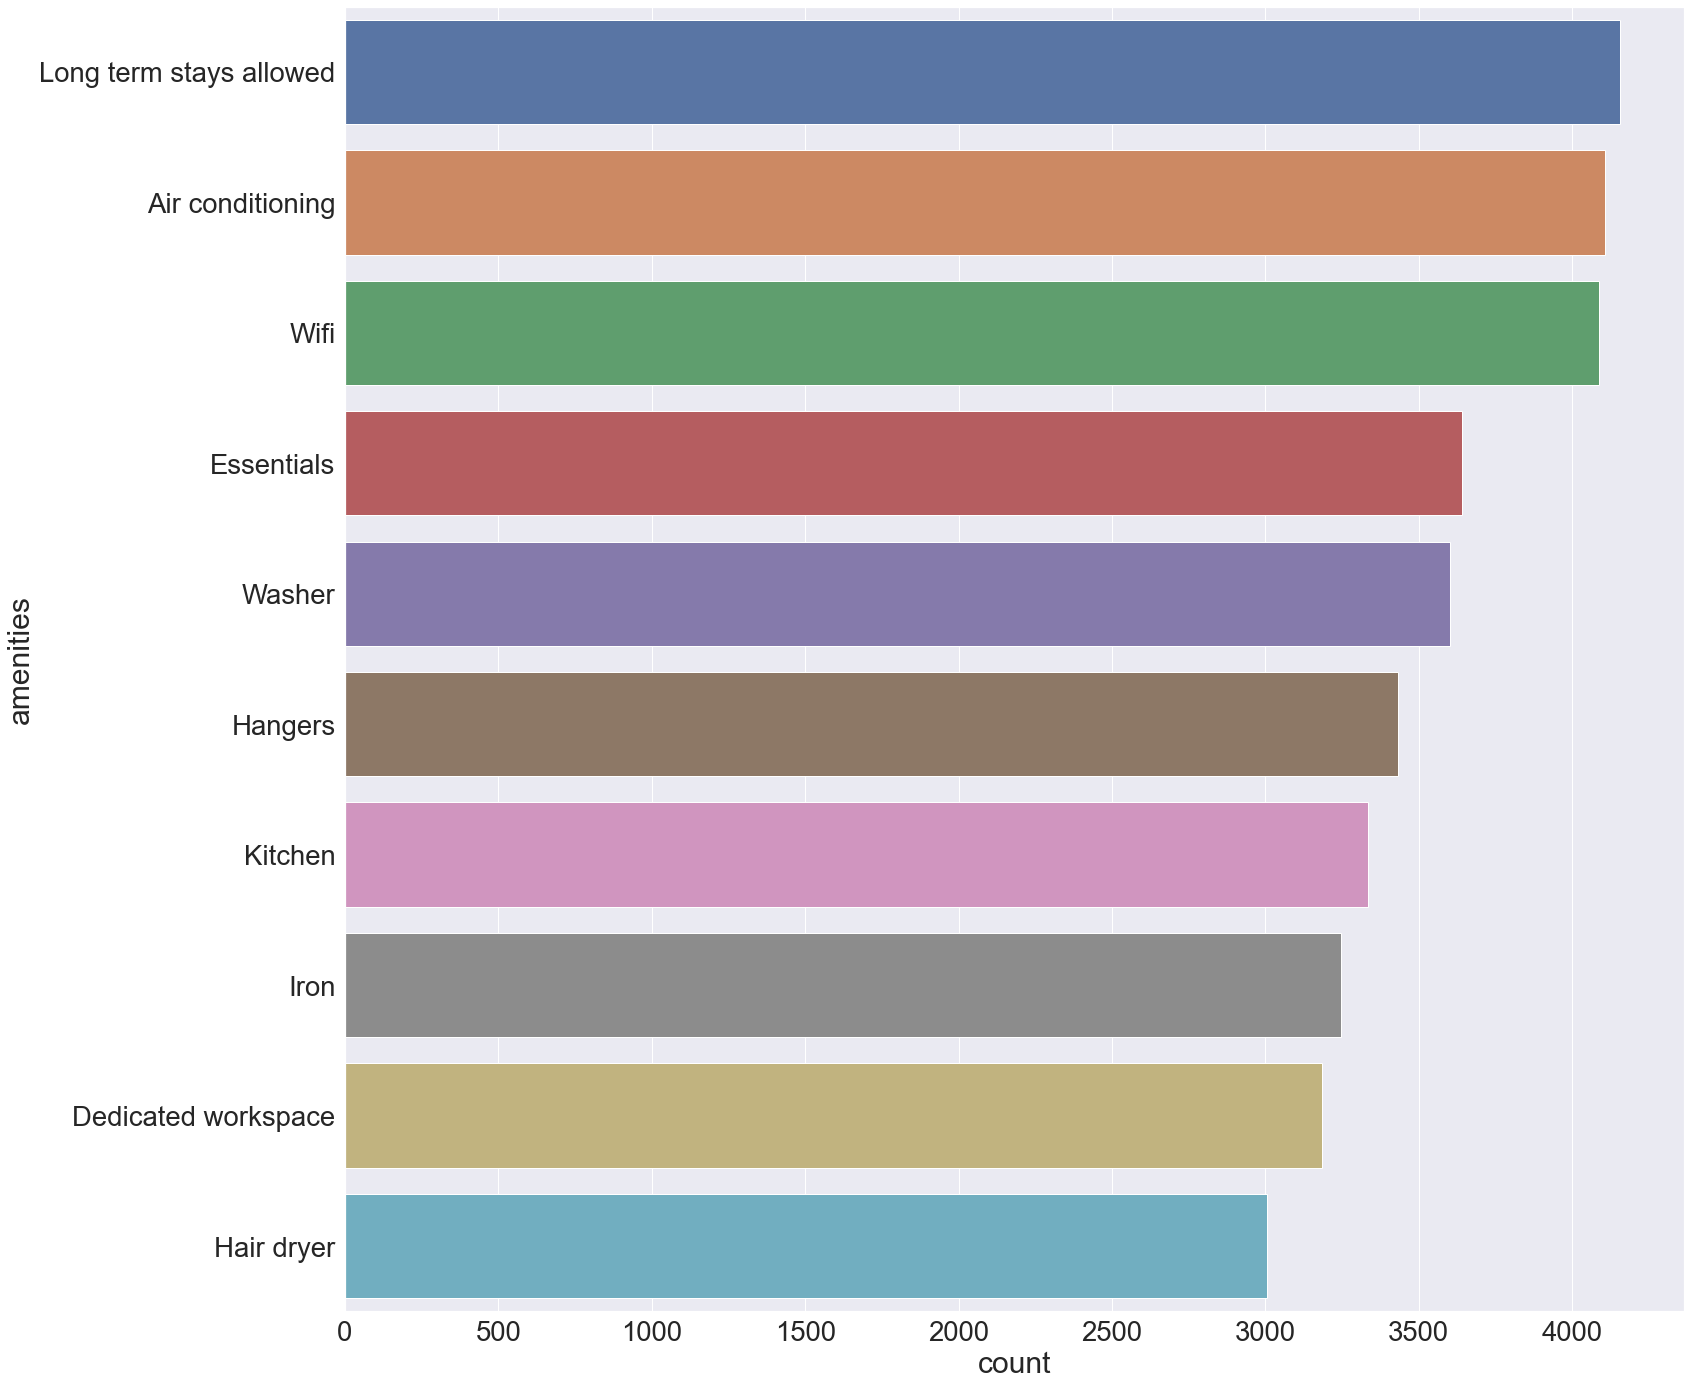

In [12]:
top_air["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
top_air["num_of_amenities"].head()
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="amenities", data=top_amenities,orient = "h")

In [13]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
print_full(top_amenities)

                 amenities  count
0  Long term stays allowed   4157
1         Air conditioning   4107
2                     Wifi   4086
3               Essentials   3641
4                   Washer   3603
5                  Hangers   3432
6                  Kitchen   3335
7                     Iron   3247
8      Dedicated workspace   3186
9               Hair dryer   3004


# Property Type of the top Rated places|

In [14]:
top_air["property_type"]=top_air['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["property_type"] =top_air["property_type"].to_frame()
top_air["property_type"].head()


C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/3712839184.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["property_type"]=top_air['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')


0    Private room in apartment
1    Private room in apartment
2    Private room in apartment
3        Private room in villa
4        Private room in house
Name: property_type, dtype: object

<AxesSubplot:xlabel='count', ylabel='property_type'>

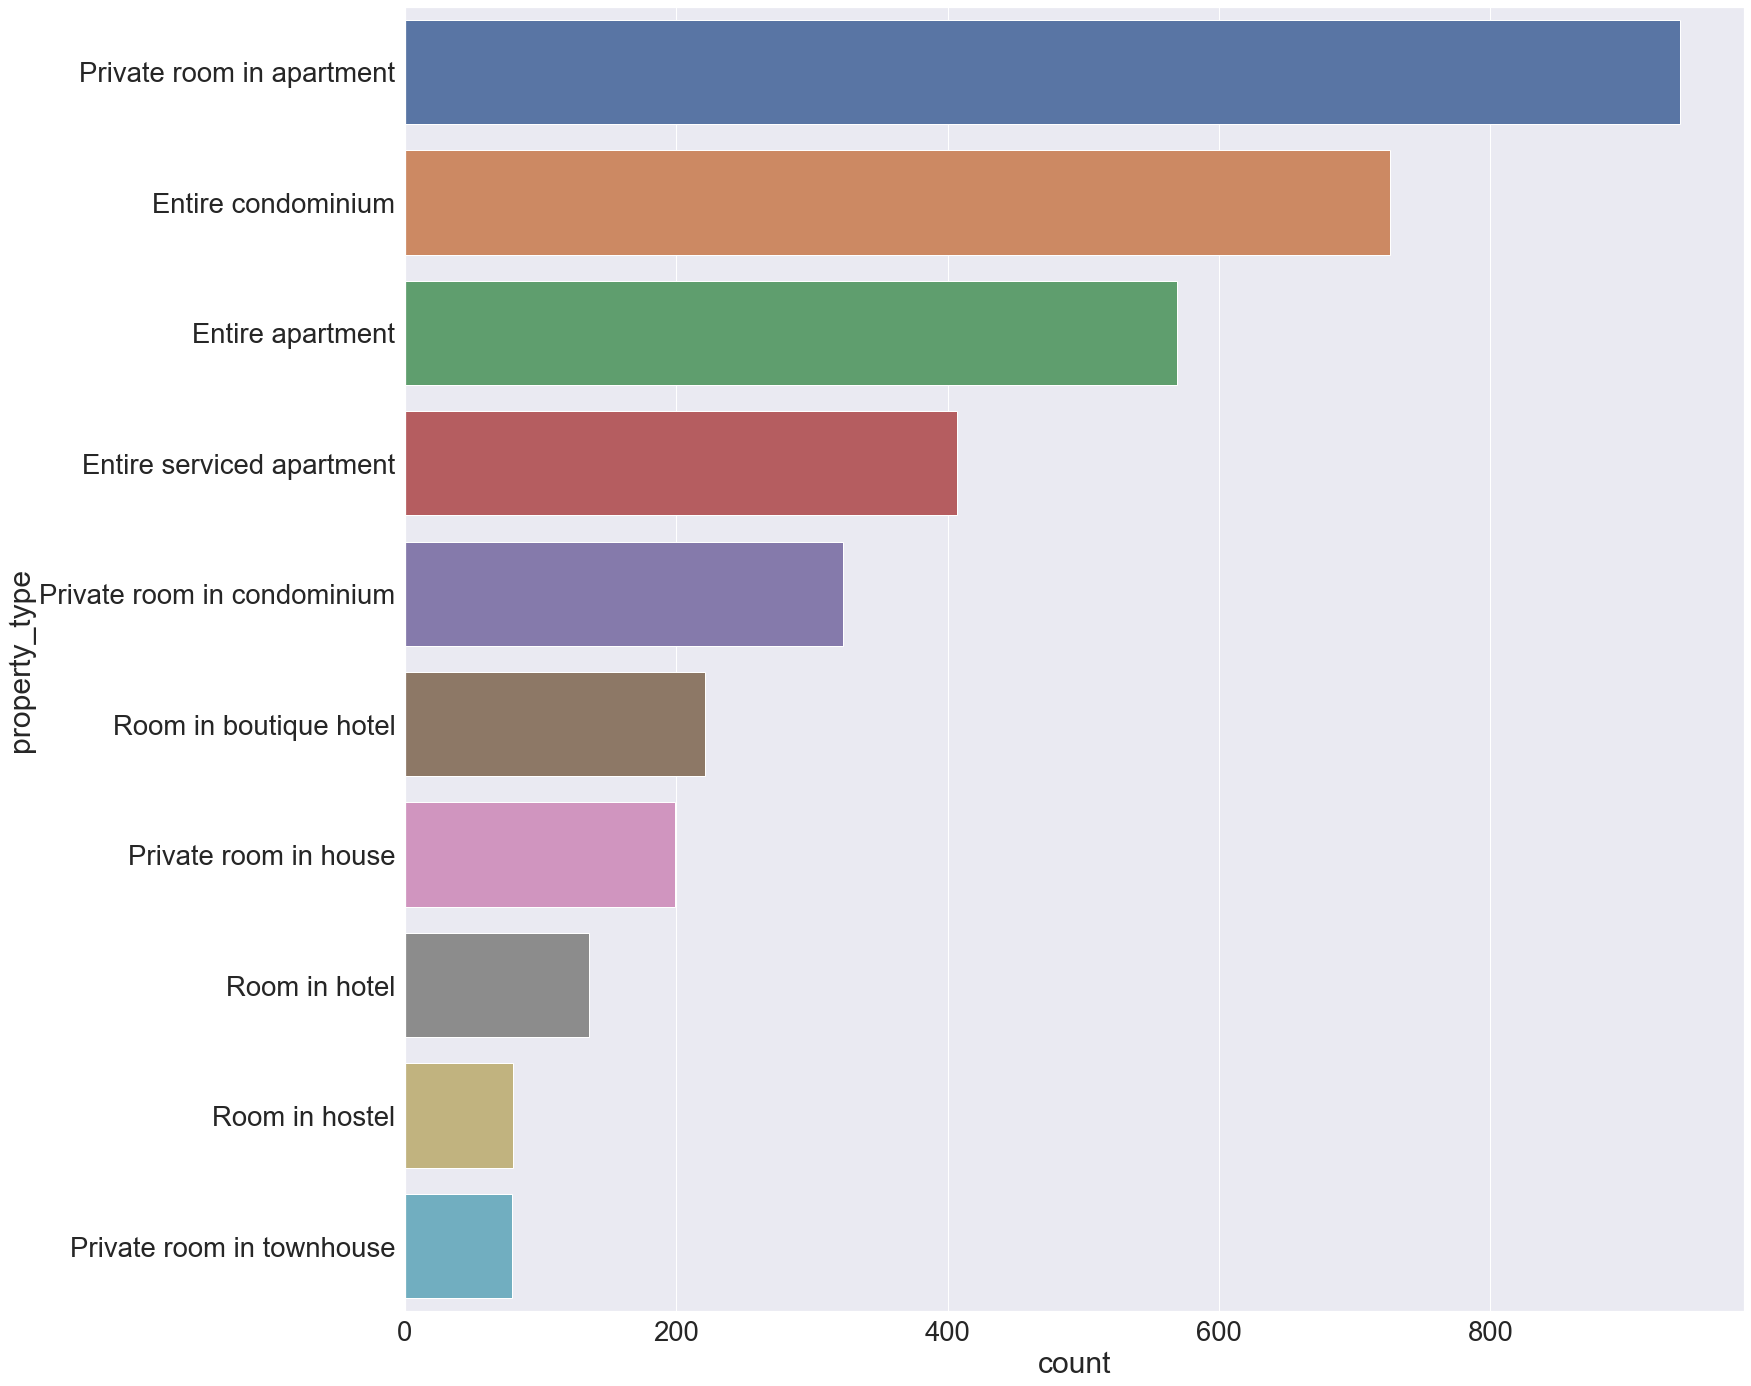

In [15]:
top_ptype = top_air['property_type'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_ptype = top_ptype.rename_axis('property_type').reset_index(name='count')

f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="property_type", data=top_ptype,orient = "h")

In [16]:
top_air["neighbourhood_cleansed"]=top_air['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','').str.replace('"','')
top_air["neighbourhood_cleansed"] =top_air["neighbourhood_cleansed"].to_frame()
top_air["neighbourhood_cleansed"].head()

top_neig = top_air['neighbourhood_cleansed'].str.split(', ', expand=True).stack().value_counts()[0:10]
top_neig = top_neig.rename_axis('neighbourhood_cleansed').reset_index(name='count')


C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/1639407068.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_air["neighbourhood_cleansed"]=top_air['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','').str.replace('"','')


<AxesSubplot:xlabel='count', ylabel='neighbourhood_cleansed'>

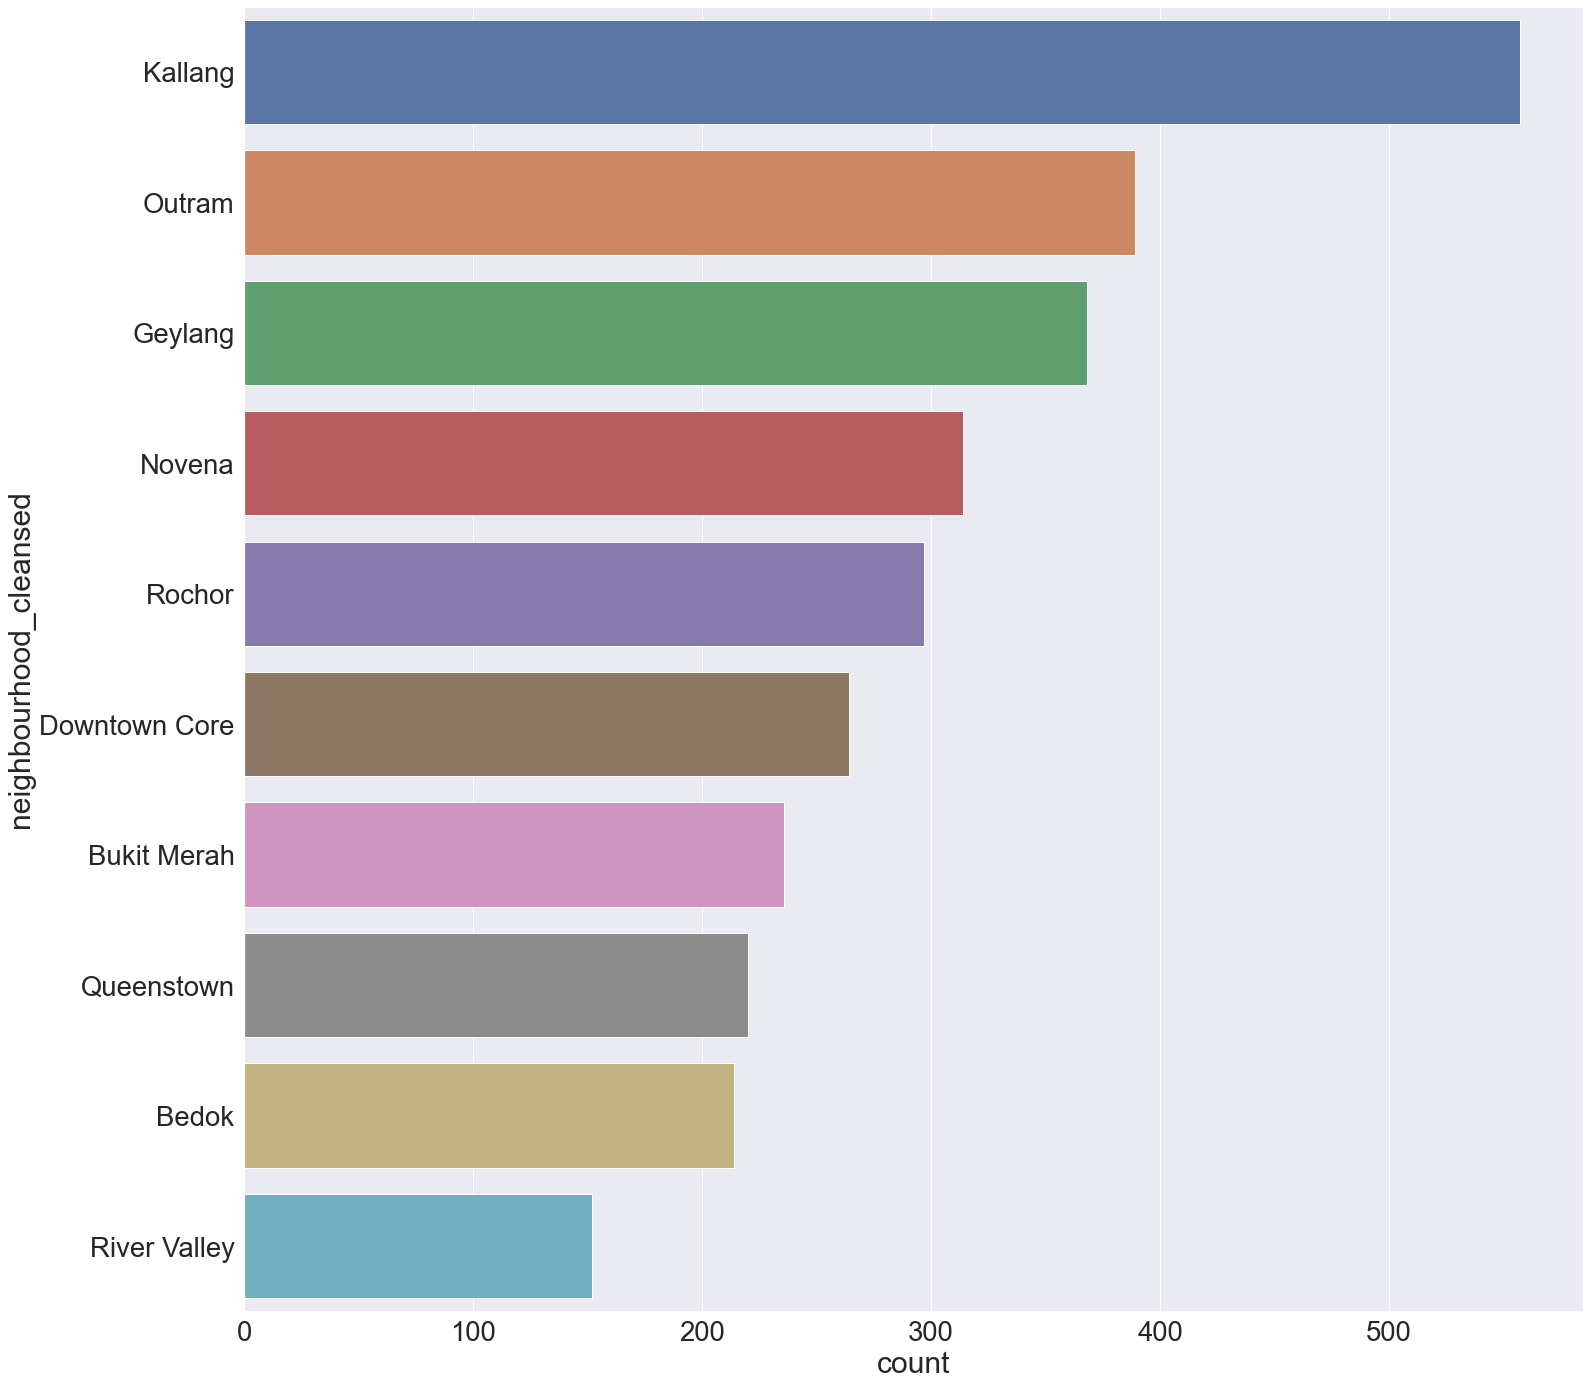

In [17]:
f = plt.figure(figsize=(24, 24))
sb.barplot(x='count', y="neighbourhood_cleansed", data=top_neig,orient = "h")

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

top_air["name"] = top_air["name"].str.replace(r'(?m)^(?:<br />)?\d+\.|<br />', '').str.replace(r'<[^<>]*>', ' ', regex=True)

#air_data["description"] = air_data["description"].str.replace(('\?|\|&|•|+|-|'), '',regex=True)
top_air["name"] = top_air["name"].str.replace('\W', ' ', regex=True)
top_air["name"] = top_air["name"].str.replace('\W', ' ', regex=True)
des = pd.DataFrame(top_air["name"])
des["name"] = des["name"].str.replace('\d+', ' ', regex=True)
des["name"] = des["name"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
des.head()
top_words =  pd.DataFrame(' '.join(des["name"]).lower().split()).value_counts()[:50]
top_words = top_words.rename_axis('top_words').reset_index(name='count')
top_words = top_words.drop(top_words.index[2])
top_words = top_words.reset_index()
del top_words["index"];
top_words.head(n=25)

C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/3938251935.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  top_air["name"] = top_air["name"].str.replace(r'(?m)^(?:<br />)?\d+\.|<br />', '').str.replace(r'<[^<>]*>', ' ', regex=True)


,top_words,count
0,room,979
1,mrt,868
2,near,593
3,apartment,531
4,studio,450
5,bedroom,445
6,city,341
7,condo,314
8,private,292
9,cozy,292


In [19]:
print_full(top_words)

    top_words  count
0        room    979
1         mrt    868
2        near    593
3   apartment    531
4      studio    450
5     bedroom    445
6        city    341
7       condo    314
8     private    292
9        cozy    292
10    orchard    291
11       mins    270
12        apt    246
13        bed    225
14  chinatown    220
15       cosy    200
16       walk    185
17  singapore    170
18   spacious    160
19         rm    157
20        cbd    155
21        min    154
22     master    150
23     single    148
24      bugis    146
25       view    138
26     novena    131
27      suite    129
28     family    127
29   lavender    127
30       park    120
31     luxury    119
32        new    118
33       road    115
34    central    114
35    ensuite    108
36   bathroom    108
37     double    103
38      hotel    102
39          a    102
40     deluxe    101
41     modern     95
42          c     89
43       home     89
44   heritage     87
45          w     87
46       area

In [20]:
#conda install -c conda-forge wordcloud

# Word Cloud to see most popular words

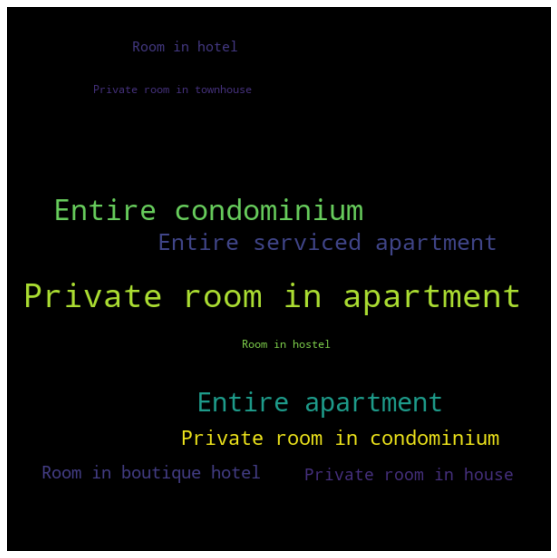

In [21]:
from wordcloud import WordCloud

d = dict(zip(top_ptype['property_type'], top_ptype['count']))


wordcloud = WordCloud(background_color="black",width=600, height=600).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

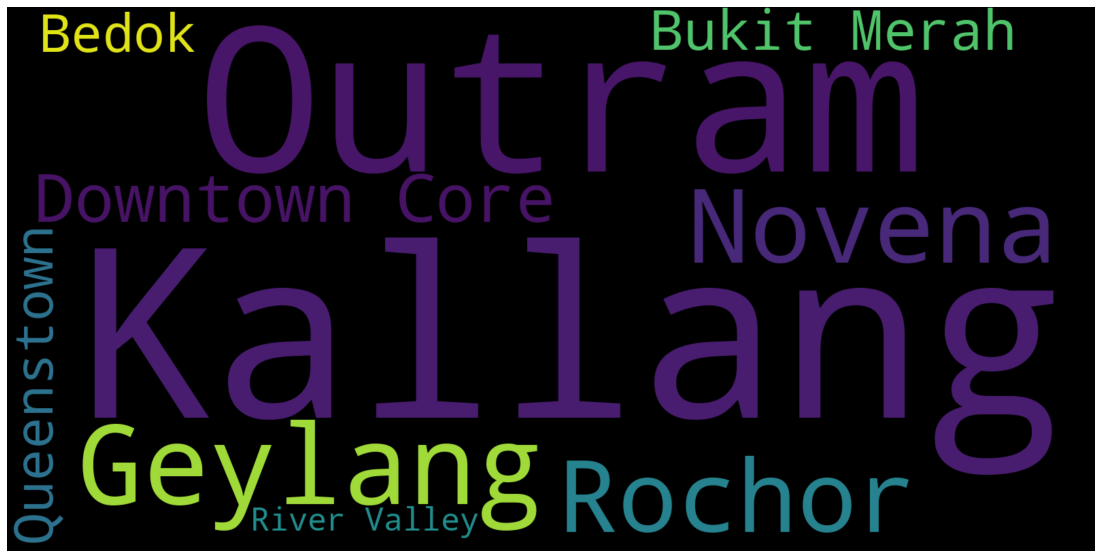

In [22]:
d = dict(zip(top_neig['neighbourhood_cleansed'], top_neig['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

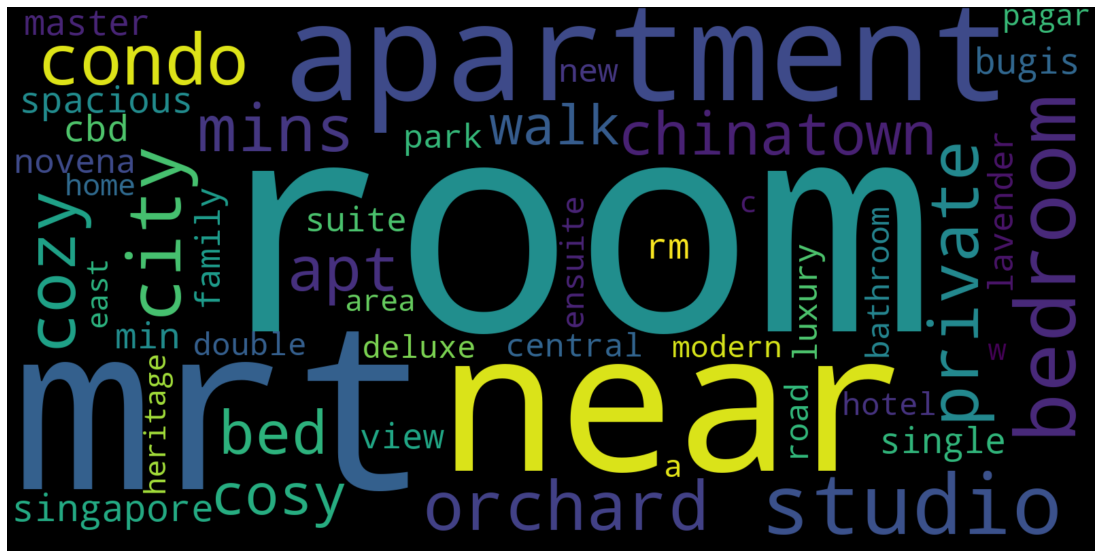

In [23]:

d = dict(zip(top_words['top_words'], top_words['count']))


wordcloud = WordCloud(background_color="black",width=1600, height=800).generate_from_frequencies(d)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bar Plots for numerical values

In [24]:
test = pd.DataFrame(air_data[['price','review_scores_rating']])

<AxesSubplot:xlabel='price', ylabel='review_scores_rating'>

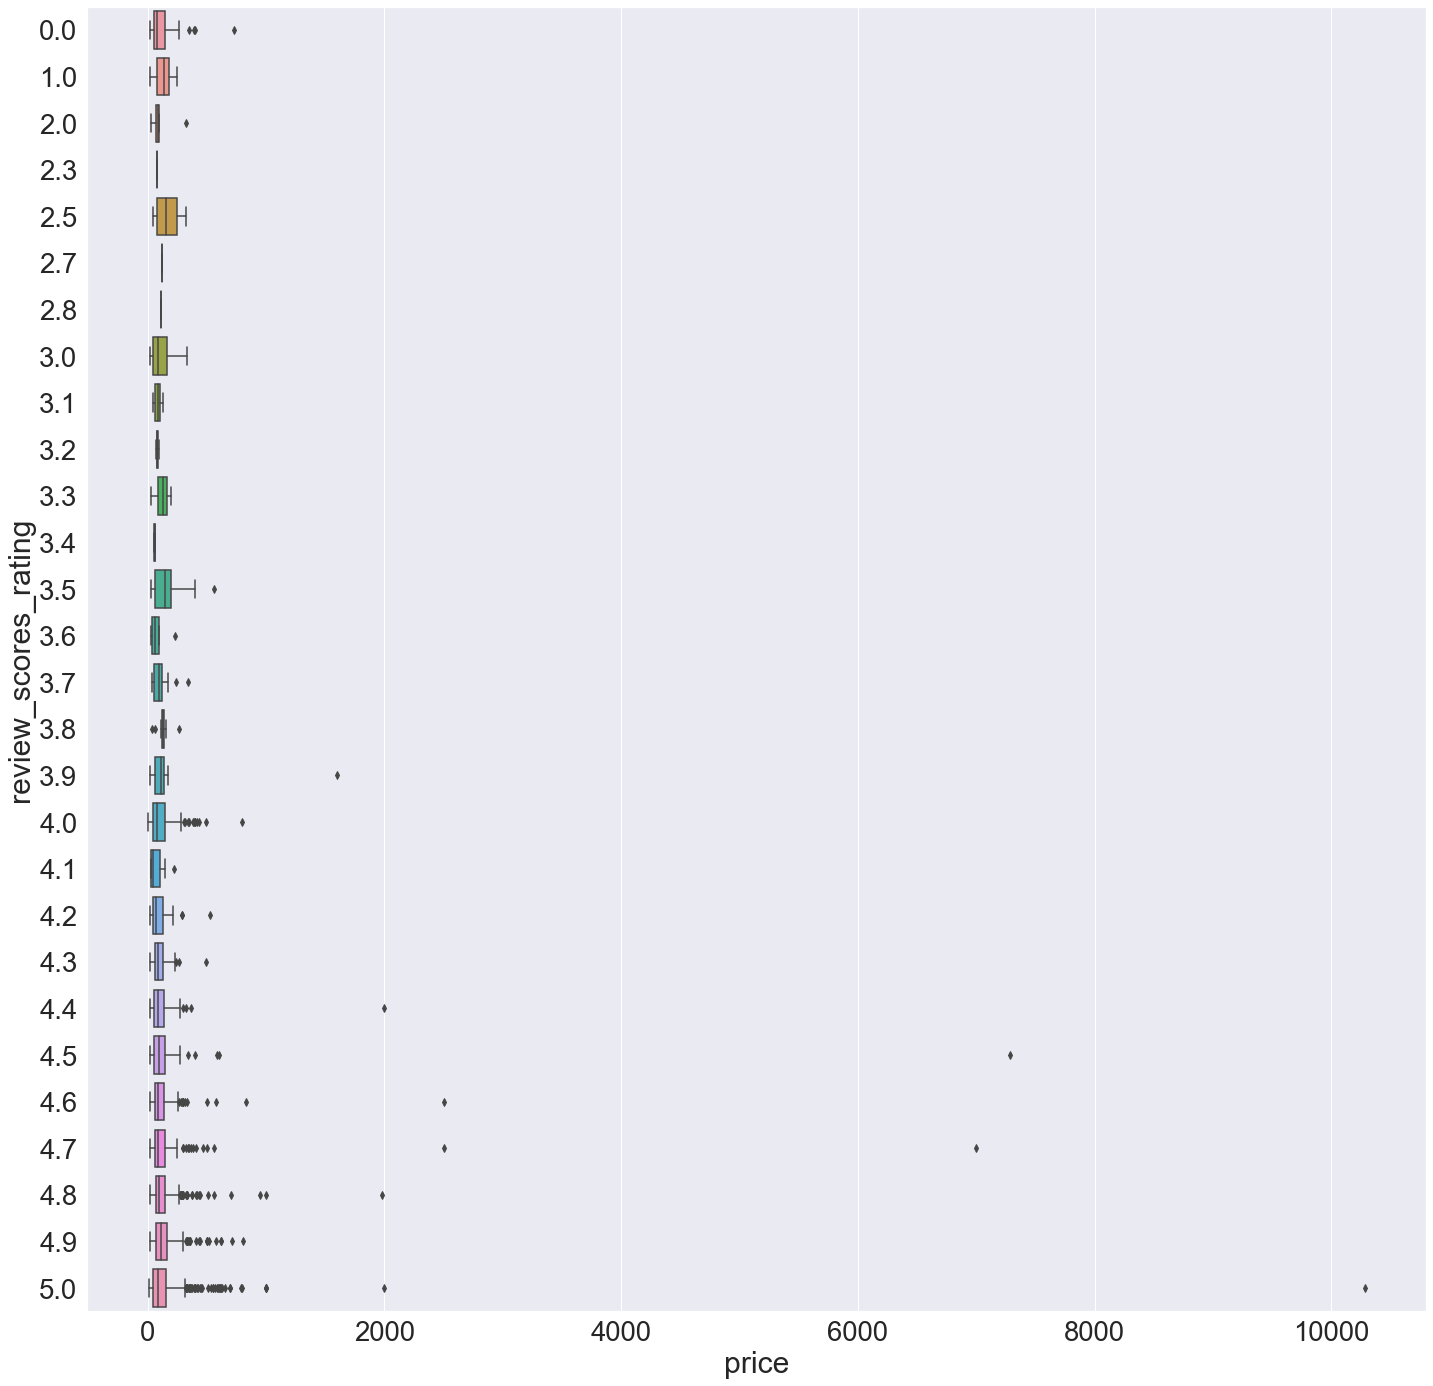

In [25]:
test = pd.DataFrame(air_data[['price','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='price', y="review_scores_rating", data=test,orient = "h")

<AxesSubplot:xlabel='num_of_amenities', ylabel='review_scores_rating'>

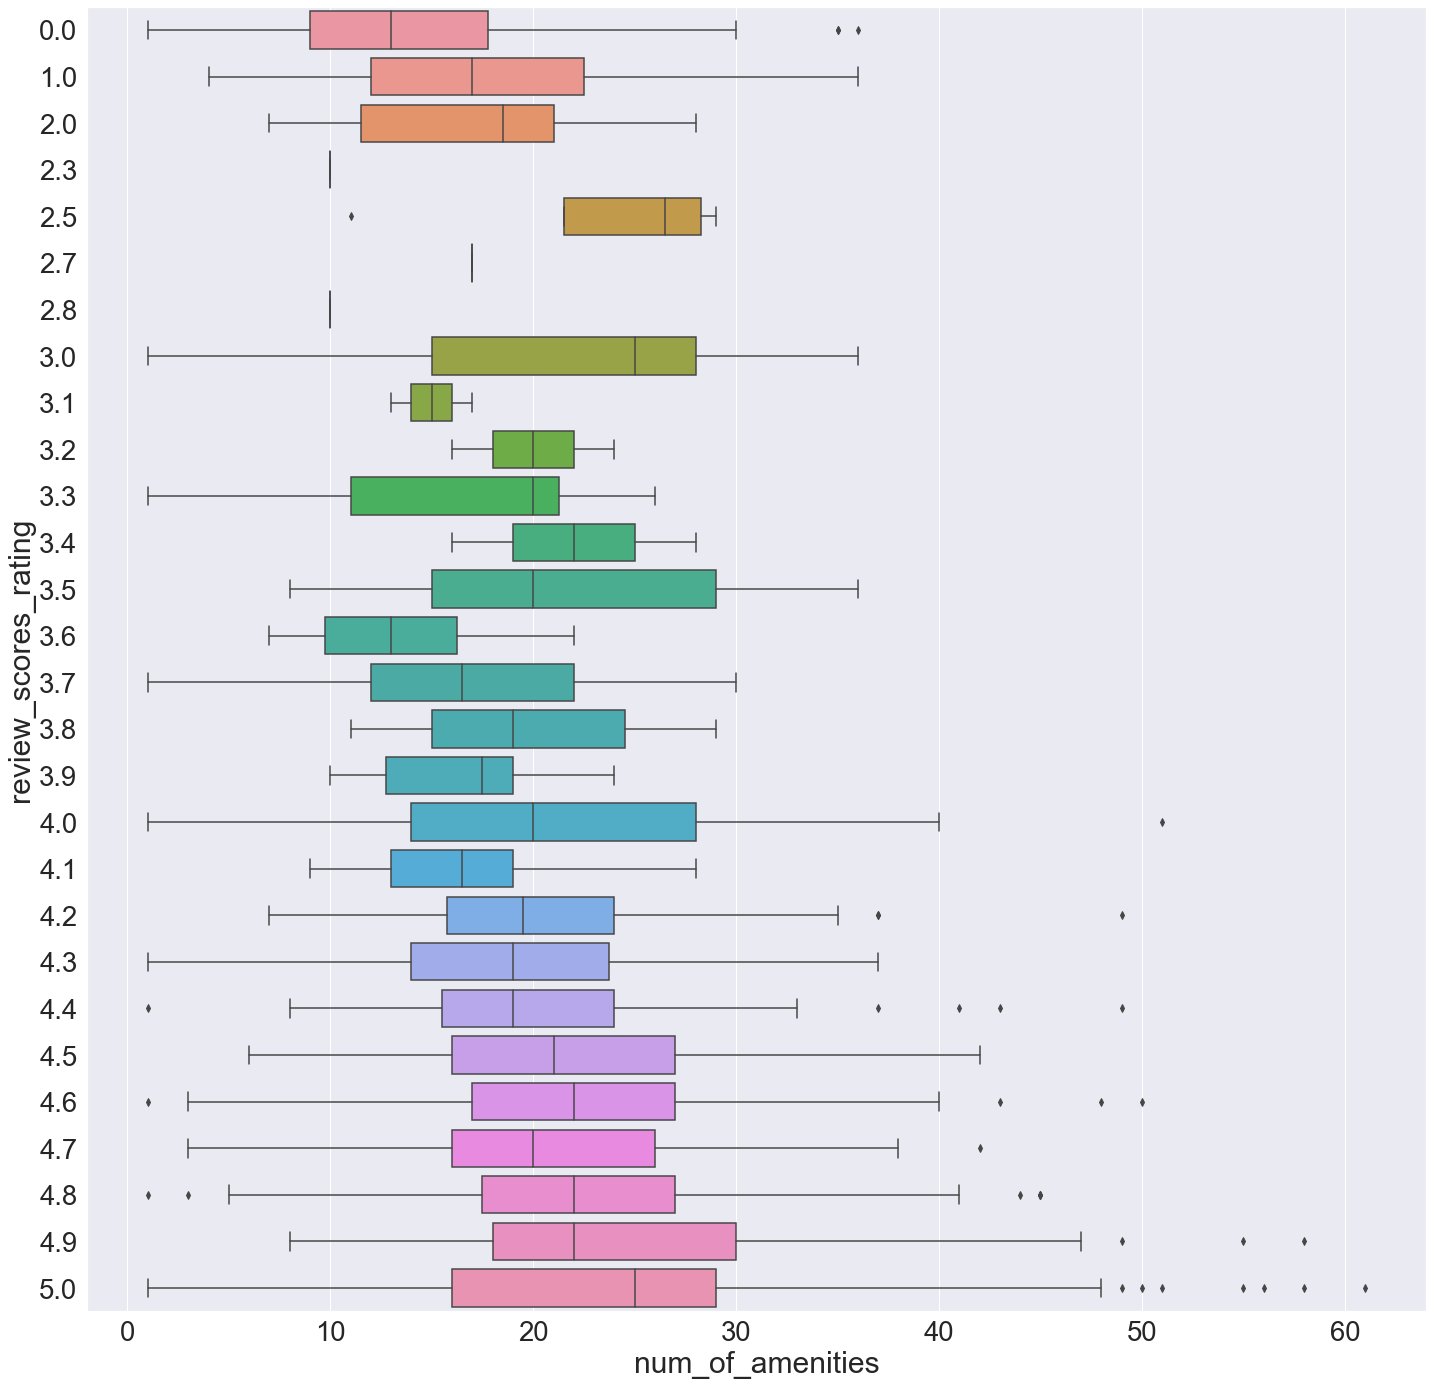

In [26]:
test = pd.DataFrame(top_air[['num_of_amenities','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='num_of_amenities', y="review_scores_rating", data=test,orient = "h")

<AxesSubplot:xlabel='num_of_veri', ylabel='review_scores_rating'>

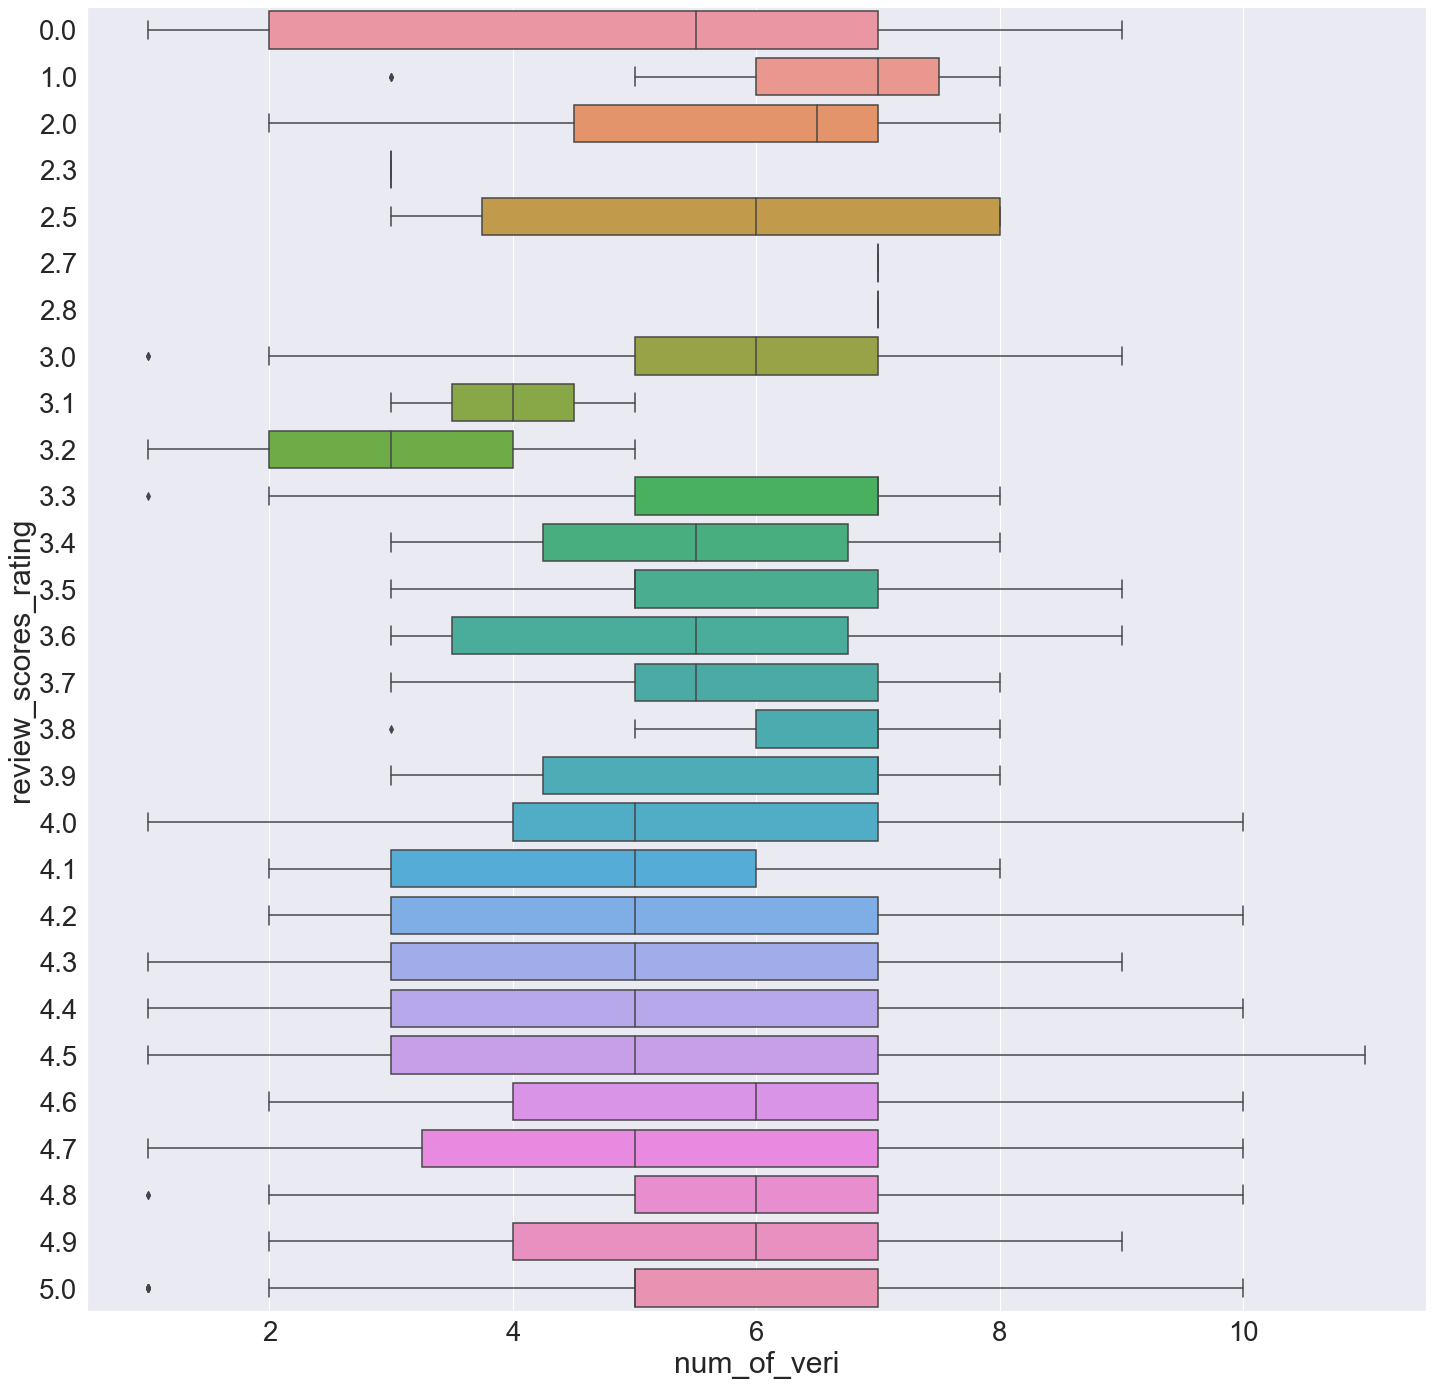

In [27]:
test = pd.DataFrame(top_air[['num_of_veri','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='num_of_veri', y="review_scores_rating", data=test,orient = "h")

<AxesSubplot:xlabel='num_of_veri', ylabel='review_scores_rating'>

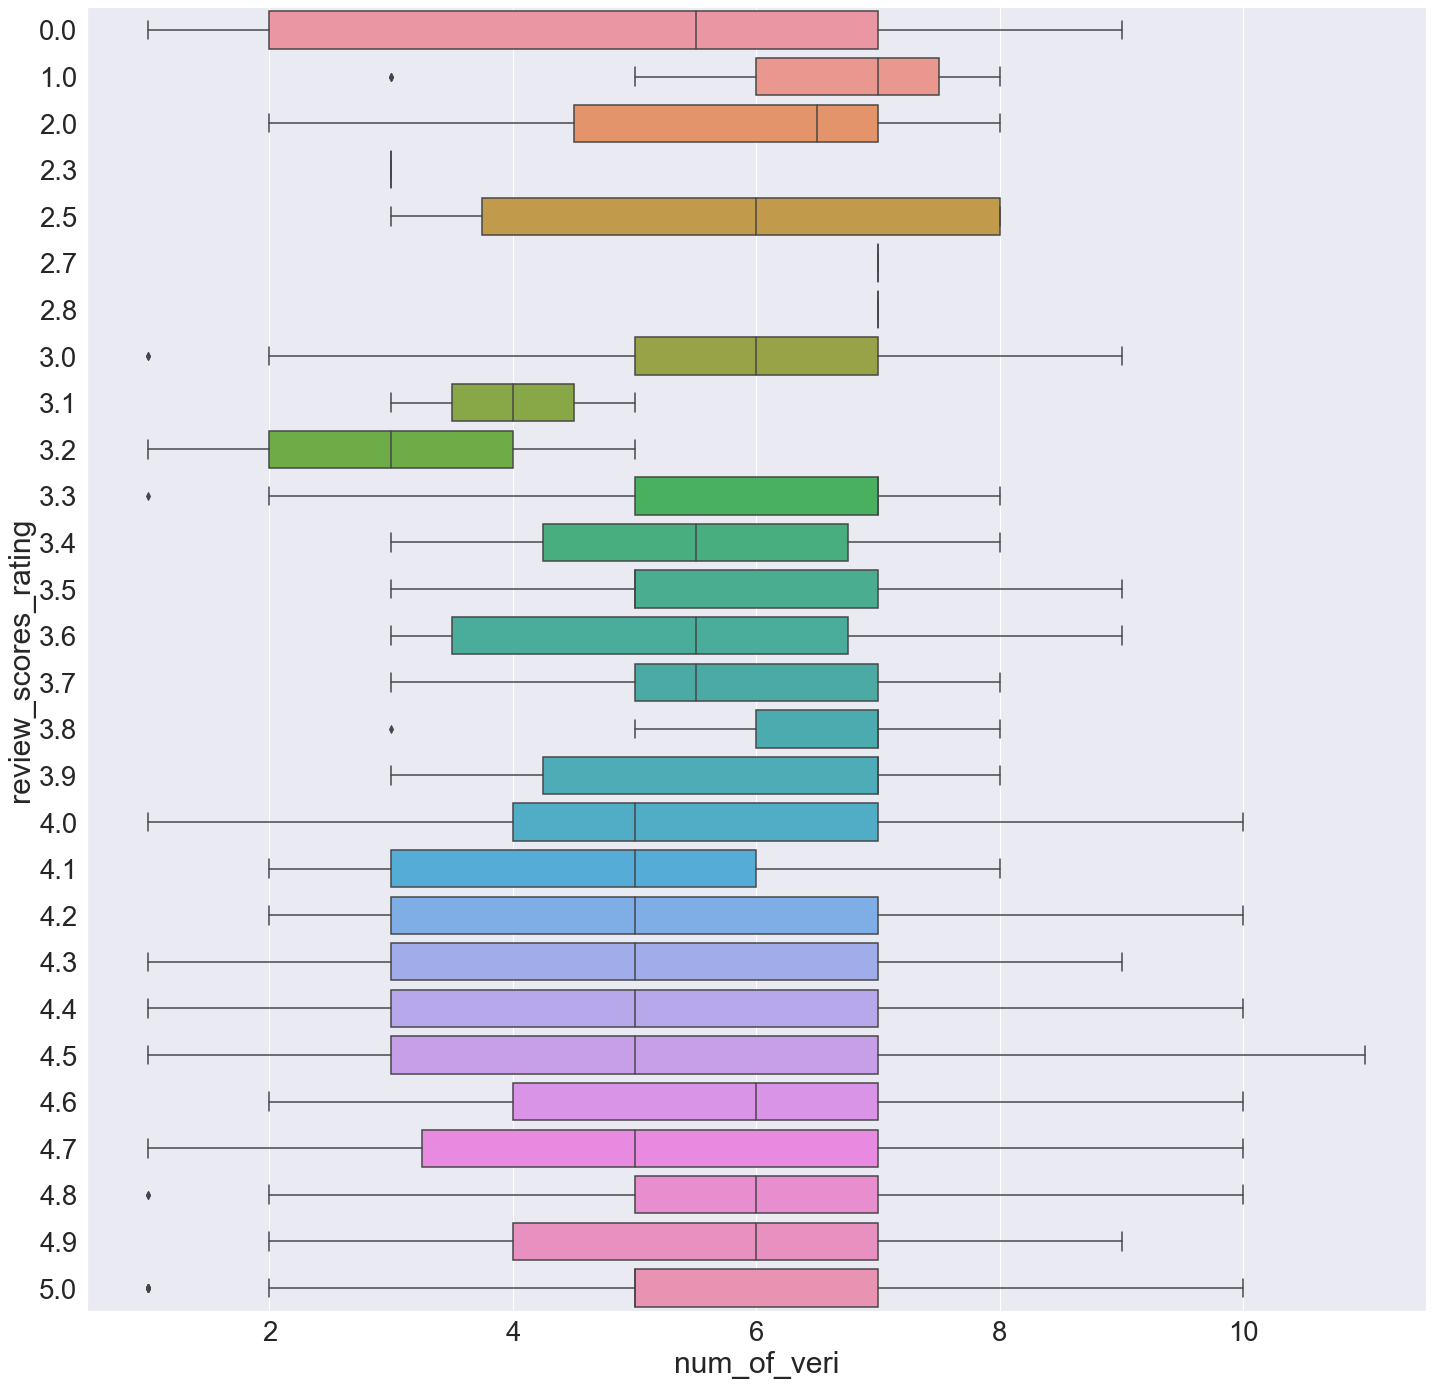

In [28]:
test = pd.DataFrame(top_air[['num_of_veri','review_scores_rating']])
f = plt.figure(figsize=(24, 24))
sb.boxplot(x='num_of_veri', y="review_scores_rating", data=test,orient = "h")

# Putting price and amenities into the same dataframe to compare

In [29]:
amenities = zhdf[['price','amenities']]

amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
amenities['amenities'] = amenities['amenities'].apply(str).str.replace('[', '').str.replace(']','').str.replace('"','')

#str.replace(' ','')
#amenities = amenities.to_frame()

amenities.head()

C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/2700618335.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/2700618335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/2700618335.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single

,price,amenities
0,81.0,"Air conditioning, Elevator, Wifi, Long term st..."
1,80.0,"Air conditioning, Kitchen, Elevator, Wifi, Gym..."
2,67.0,"Air conditioning, Kitchen, Elevator, Wifi, Cab..."
3,177.0,"Wifi, Washer, Kitchen, Long term stays allowed..."
4,81.0,"Wifi, Washer, Kitchen, Long term stays allowed..."


# Check count of how many amenities are there in total

In [30]:
amenities['amenities'] = amenities['amenities'].str.decode('unicode_escape')
a = amenities['amenities'].str.split(', ', expand=True).stack().value_counts()
test_df = a.rename_axis('amenities').reset_index(name='count')

C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/3105268720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['amenities'] = amenities['amenities'].str.decode('unicode_escape')


In [31]:
print_full(test_df)

                                             amenities  count
0                              Long term stays allowed   4157
1                                     Air conditioning   4107
2                                                 Wifi   4086
3                                           Essentials   3641
4                                               Washer   3603
5                                              Hangers   3432
6                                              Kitchen   3335
7                                                 Iron   3247
8                                  Dedicated workspace   3186
9                                           Hair dryer   3004
10                                               Dryer   2794
11                                           Hot water   2697
12                                             Shampoo   2670
13                                        Refrigerator   2217
14                                            Elevator   2147
15      

# Bar graph of amenity count

<BarContainer object of 15 artists>

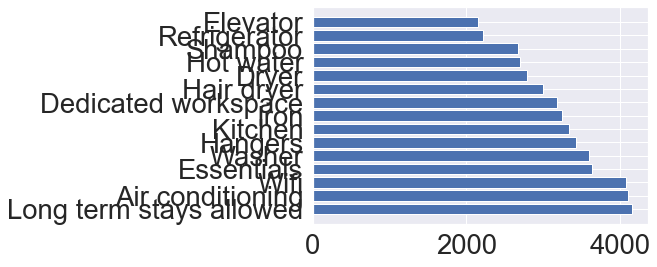

In [32]:
plt.barh(test_df['amenities'].head(15), test_df['count'].head(15))

# Put price and rating into same dataframe to compare

In [33]:
pricedf = zhdf[['price', 'review_scores_rating']]
pricedf.head()

,price,review_scores_rating
0,$81.00,5.00
1,$80.00,4.56
2,$67.00,4.88
3,$177.00,4.44
4,$81.00,4.16


In [34]:
#remove extra unnecessary symbols and change price to float
pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)
pricedf.head()

C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/1771786605.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/1771786605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)


,price,review_scores_rating
0,81.0,5.00
1,80.0,4.56
2,67.0,4.88
3,177.0,4.44
4,81.0,4.16


# Plot ratings against price

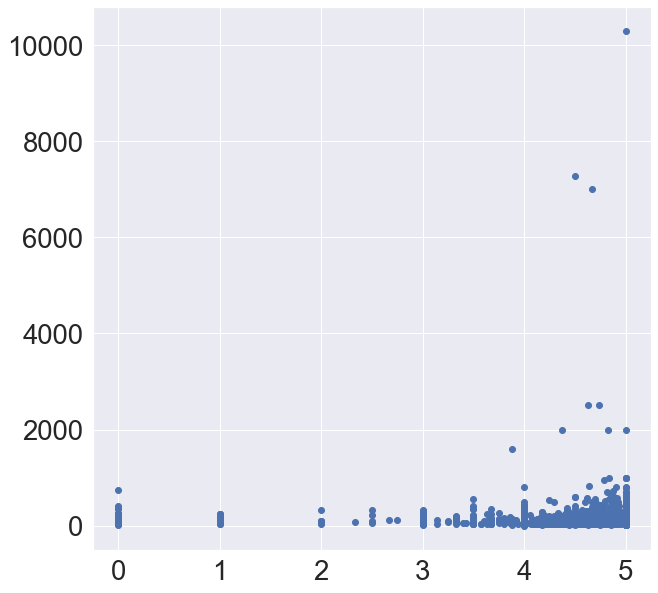

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(pricedf['review_scores_rating'], pricedf['price'])

In [36]:
test_df.head()

,amenities,count
0,Long term stays allowed,4157
1,Air conditioning,4107
2,Wifi,4086
3,Essentials,3641
4,Washer,3603


# Count number of amenities PER listing

In [37]:
amenities['amenities_count'] = amenities['amenities'].str.split(', ').apply(len)
amenities.head()

C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/2564024349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['amenities_count'] = amenities['amenities'].str.split(', ').apply(len)


,price,amenities,amenities_count
0,81.0,"Air conditioning, Elevator, Wifi, Long term st...",7
1,80.0,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12
2,67.0,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8
3,177.0,"Wifi, Washer, Kitchen, Long term stays allowed...",25
4,81.0,"Wifi, Washer, Kitchen, Long term stays allowed...",21


# Regression plot for price against amenities count per listing

<AxesSubplot:xlabel='amenities_count', ylabel='price'>

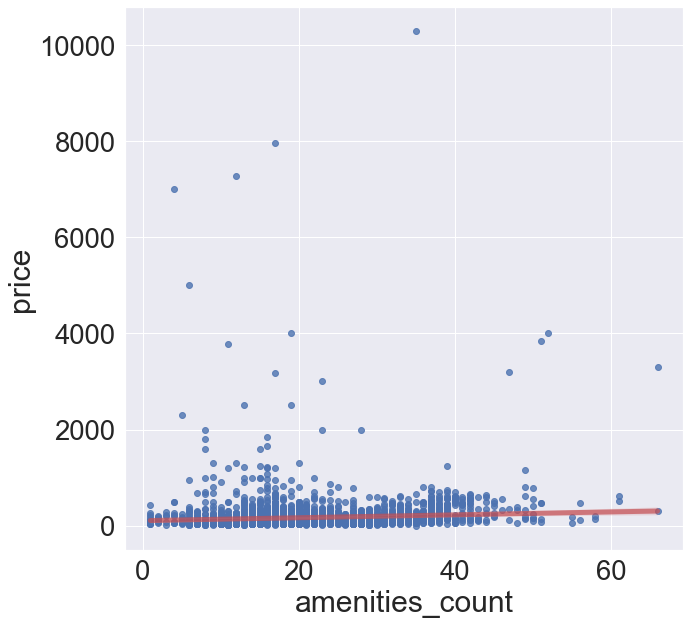

In [38]:
plt.figure(figsize=(10,10))
sb.regplot(y=amenities['price'], x=amenities['amenities_count'], line_kws={"color":"r","alpha":0.7,"lw":5})

In [39]:
amenities.insert(1, 'review_scores_rating', zhdf['review_scores_rating'])
amenities.head()

#jointDF = pd.concat([days_created, review], axis =1)
###jointDF.corr()
#sb.heatmap(jointDF.corr(), vmin =-1, vmax =1, annot=True, fmt=".2F")

,price,review_scores_rating,amenities,amenities_count
0,81.0,5.00,"Air conditioning, Elevator, Wifi, Long term st...",7
1,80.0,4.56,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12
2,67.0,4.88,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8
3,177.0,4.44,"Wifi, Washer, Kitchen, Long term stays allowed...",25
4,81.0,4.16,"Wifi, Washer, Kitchen, Long term stays allowed...",21


# Scatter plot of amenity count against ratings

<AxesSubplot:xlabel='review_scores_rating', ylabel='amenities_count'>

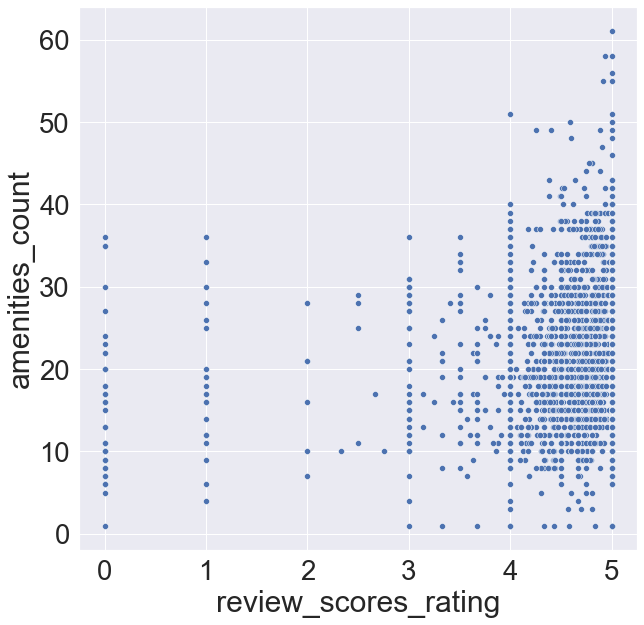

In [40]:
plt.figure(figsize=(10,10))
sb.scatterplot(x=amenities['review_scores_rating'], y=amenities['amenities_count'])

In [41]:
amenity_list_top = test_df['amenities'].head(15)
print(amenity_list_top)

0     Long term stays allowed
1            Air conditioning
2                        Wifi
3                  Essentials
4                      Washer
5                     Hangers
6                     Kitchen
7                        Iron
8         Dedicated workspace
9                  Hair dryer
10                      Dryer
11                  Hot water
12                    Shampoo
13               Refrigerator
14                   Elevator
Name: amenities, dtype: object


In [42]:
#check amenity list against amenity column to see if it exists, then
#then append column to dataframe

for i in amenity_list_top:
    amenities['has_{variable}'.format(variable=i.lower().strip())] = amenities['amenities'].apply(lambda x: str(i) in str(amenities['amenities']))
    
amenities.head()

C:\Users\junwe\AppData\Local\Temp/ipykernel_16768/1343124337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['has_{variable}'.format(variable=i.lower().strip())] = amenities['amenities'].apply(lambda x: str(i) in str(amenities['amenities']))


,price,review_scores_rating,amenities,amenities_count,has_long term stays allowed,has_air conditioning,has_wifi,has_essentials,has_washer,has_hangers,has_kitchen,has_iron,has_dedicated workspace,has_hair dryer,has_dryer,has_hot water,has_shampoo,has_refrigerator,has_elevator
0,81.0,5.00,"Air conditioning, Elevator, Wifi, Long term st...",7,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
1,80.0,4.56,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
2,67.0,4.88,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
3,177.0,4.44,"Wifi, Washer, Kitchen, Long term stays allowed...",25,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True
4,81.0,4.16,"Wifi, Washer, Kitchen, Long term stays allowed...",21,True,True,True,False,True,True,True,False,False,False,False,True,False,False,True


<h1> Heat Map to show AirBnb Listings </h1>

<p> We will need to install folium, a library used to visualize geo-spatial data </p>

In [43]:
#pip install folium

Note: you may need to restart the kernel to use updated packages.


In [44]:
import folium
from folium.plugins import HeatMap

In [45]:
map_folium = folium.Map([1.35255,103.82580],zoom_start=11.4)
HeatMap(air_data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)  

In [69]:
# Multi bins
review_bins = [0, 1, 2,3,4, 5]
review_labels = ["very bad", "ok", "good", "very good"]
sb.set(font_scale=1)


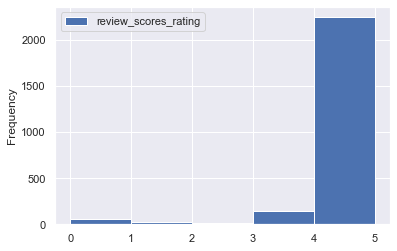

In [70]:
review_scores_rating = pd.DataFrame(air_data['review_scores_rating']).copy()
h = review_scores_rating.plot.hist(by = "review_scores_rating", bins = review_bins)


In [71]:
outlier_ratings = air_data[air_data['review_scores_rating']<=2.0]

In [72]:
outlier_ratings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,num_of_veri,num_of_amenities,days_created
266,6607671,https://www.airbnb.com/rooms/6607671,20210629180711,2021-06-29,Central Entired Condo Apartment min walk to 3...,Apartment in Central Singapore with condo faci...,[Nearby Places]<br />1. City Square Mall:<br /...,https://a0.muscache.com/pictures/83244799/b815...,21149720,https://www.airbnb.com/users/show/21149720,...,NaN,f,16,16,0,0,0.02,8,36,2784.0
335,7766300,https://www.airbnb.com/rooms/7766300,20210629180711,2021-06-30,Private room,Fully furnished <br />All facilities near by<b...,NaN,https://a0.muscache.com/pictures/98775103/80ad...,31212677,https://www.airbnb.com/users/show/31212677,...,NaN,t,2,0,2,0,0.04,7,16,2567.0
351,7996456,https://www.airbnb.com/rooms/7996456,20210629180711,2021-06-29,Room in heartlands,This is my room ..Rather basic with air condit...,I live in the heartlands of Singapore. Jurong ...,https://a0.muscache.com/pictures/101916427/d12...,34262041,https://www.airbnb.com/users/show/34262041,...,NaN,f,1,0,0,1,0.02,6,11,2525.0
403,8681954,https://www.airbnb.com/rooms/8681954,20210629180711,2021-06-30,The private room is bright so,Welcome!<br />The room is located on the secon...,NaN,https://a0.muscache.com/pictures/110157544/d3e...,29977398,https://www.airbnb.com/users/show/29977398,...,NaN,f,3,0,3,0,0.02,8,10,2587.0
423,9105592,https://www.airbnb.com/rooms/9105592,20210629180711,2021-06-29,Private Room for 2,Clean and spacious. Free WIFI 24 hrs.<br /><br...,Its a busy neighbourhood area.<br /><br />5 mi...,https://a0.muscache.com/pictures/1eb1a9e4-40cd...,39205735,https://www.airbnb.com/users/show/39205735,...,NaN,f,1,0,1,0,0.03,3,9,2468.0


In [73]:
outlier_ratings['neighbourhood_cleansed'].head()

266        Kallang
335        Punggol
351    Jurong East
403      Pasir Ris
423         Yishun
Name: neighbourhood_cleansed, dtype: object

In [74]:
outlier_ratings['accommodates'].head()

266    6
335    2
351    1
403    2
423    2
Name: accommodates, dtype: int64

In [75]:
outlier_ratings['price'].head()

266    181.0
335     55.0
351     50.0
403     32.0
423     80.0
Name: price, dtype: float32

C:\Users\junwe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'review_scores_rating'),
 Text(0, 0.5, 'neighbourhood_cleansed'),

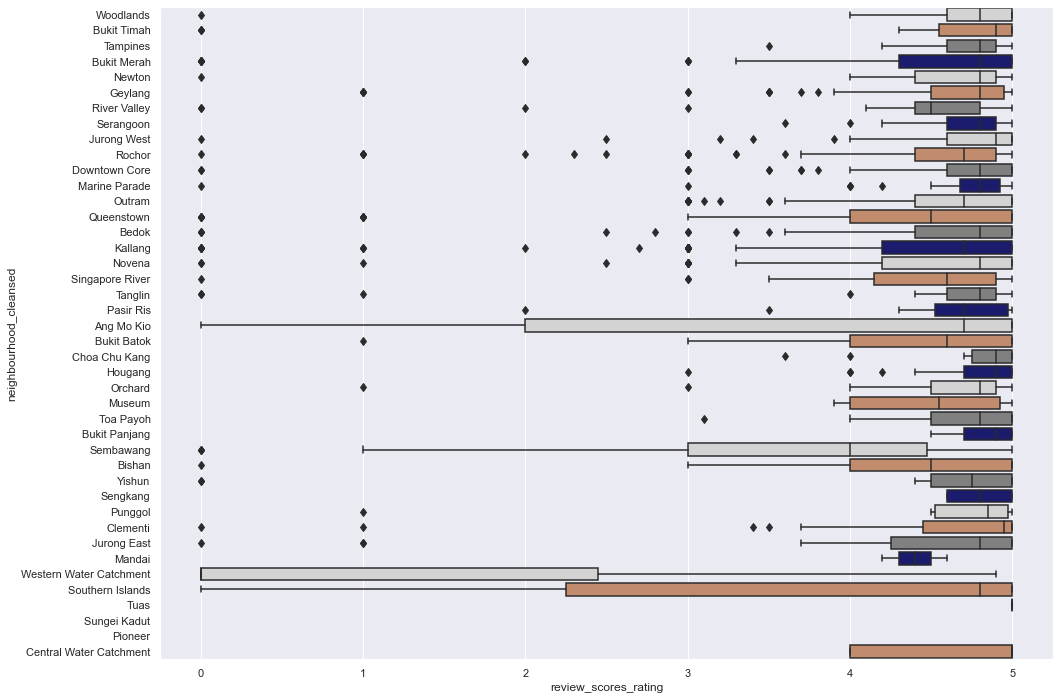

In [76]:
plt.figure(figsize=(16,12))
p = sb.boxplot("review_scores_rating", "neighbourhood_cleansed", data = air_data, saturation = .6, fliersize = 6., palette = ["lightgray", sb.color_palette()[1], "grey", "darkblue"])
p.set(xlabel = "review_scores_rating", ylabel = "neighbourhood_cleansed", xticks = range(6))

In [77]:
from datetime import datetime
date_created = pd.to_datetime(air_data['host_since'], infer_datetime_format=True)
curr_time = pd.to_datetime("now")

In [78]:
air_data['days_created'] = (curr_time - date_created).dt.days
days_created = air_data['days_created']
days_created = days_created.astype(float)
review = air_data['review_scores_rating']

<AxesSubplot:>

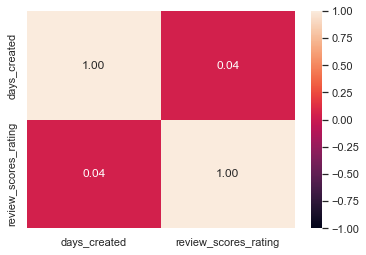

In [79]:
jointDF = pd.concat([days_created, review], axis =1)
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin =-1, vmax =1, annot=True, fmt=".2F")

<AxesSubplot:xlabel='review_scores_rating', ylabel='days_created'>

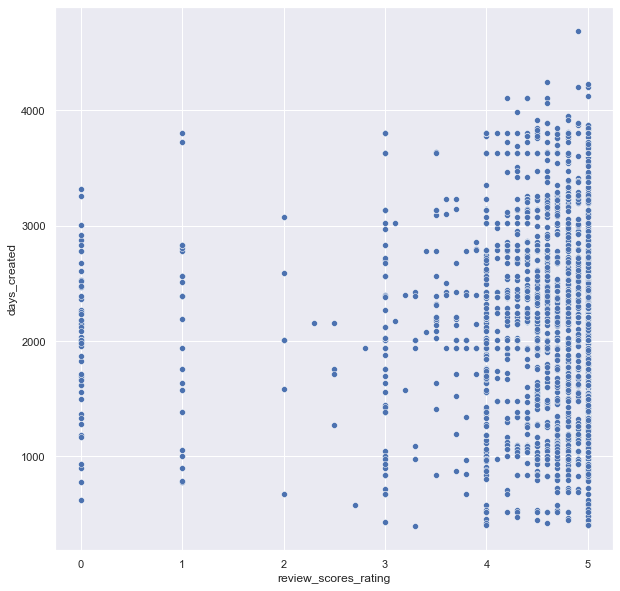

In [80]:
plt.figure(figsize=(10,10))
sb.scatterplot(x=air_data['review_scores_rating'], y=air_data['days_created'])

In [81]:
is_superHost = air_data[air_data['host_is_superhost']=='t']
not_superHost = air_data[air_data['host_is_superhost']=='f']

In [82]:
is_superHost['description'].head()

29    Our premier suite is a lovely large room with ...
33    Perfect sharing space. 2 bedrooms, each have t...
34    Bright and airy suite with high ceilings, fan,...
40    Home sweet home. That's exactly you will feel ...
41    A beautiful apartment conveniently located alo...
Name: description, dtype: object

In [83]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\junwe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\junwe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\junwe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
amenitiesDF = air_data[['amenities','review_scores_rating','id',]]
sorted_amenities = amenitiesDF.sort_values('review_scores_rating',ascending=[0])
top_amenitiesDF=sorted_amenities.head(30)
amenities_grp = ''
for index,row in top_amenitiesDF.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    amenities_grp+=p

amenities_grp_words =nltk.word_tokenize(amenities_grp)
filtered_data=[word for word in amenities_grp_words if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
amenities_grp_words=[wnl.lemmatize(data) for data in filtered_data]
amenities_words=' '.join(amenities_grp_words)

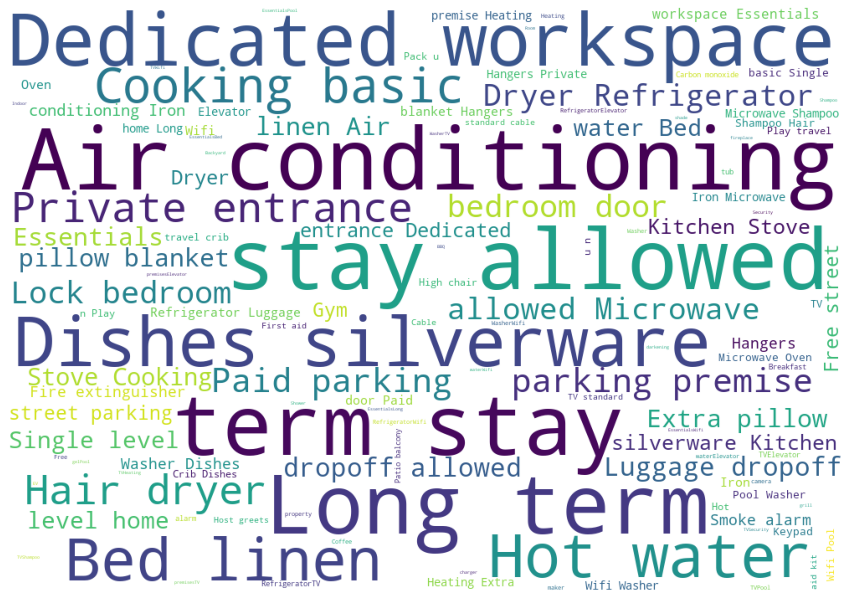

In [85]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(amenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [86]:
percentage = air_data['host_response_rate'].str.rstrip('%').astype('float') 

In [87]:
percentage.head()

0    100.0
1      NaN
2    100.0
3    100.0
4    100.0
Name: host_response_rate, dtype: float64

<AxesSubplot:>

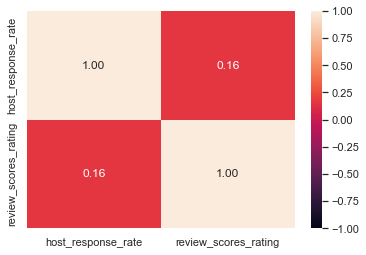

In [88]:
jointDF = pd.concat([percentage, review], axis =1)
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin =-1, vmax =1, annot=True, fmt=".2F")

In [89]:
price_cleansed = air_data.loc[(air_data['price'].astype(float) < 1200)]

<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

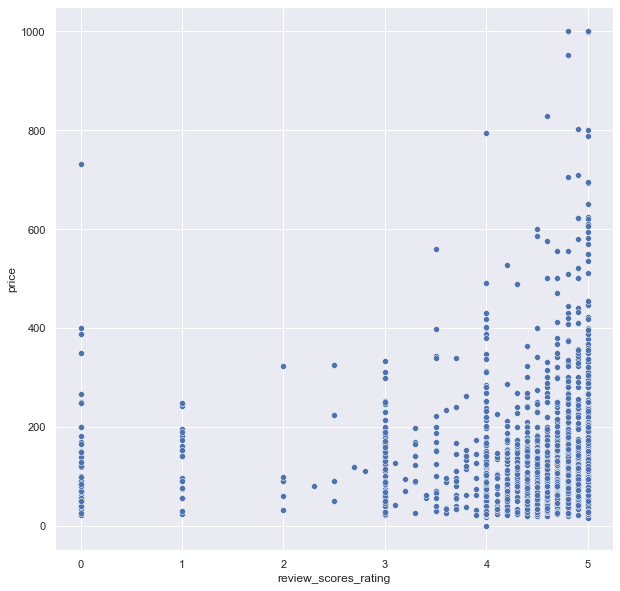

In [90]:
plt.figure(figsize=(10,10))
sb.scatterplot(x=air_data['review_scores_rating'], y=price_cleansed['price'])

<AxesSubplot:>

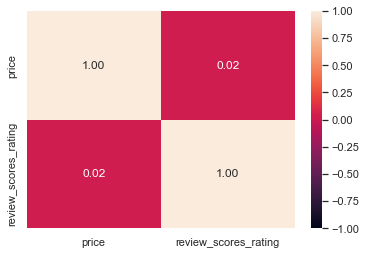

In [91]:
jointDF = pd.concat([price_cleansed['price'], review], axis =1)
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin =-1, vmax =1, annot=True, fmt=".2F")